# Análisis exploratorio de datos

En este ejercicio de prueba, haré un análisis de datos que he recogido de Kaggle.com, después de ese análisis creare un modelo de predicción para que nos de una estimación de precio de venta de una vivienda.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
#Leemos el archivo y lo guardamos en un dataframe
df = pd.read_csv('csv_final.csv')
df.head()

,Url,Zestimate,Price,Rent Zestimate,Days On Zillow,Bathrooms,Bedrooms,Living Area,Lot Size,Home Type,...,State,Country,Broker Name,Has 3D Model,Has Image,Has Video,isZillowOwned,sgapt,statusText,statusType
0,https://www.zillow.com/homedetails/8198-Uphill...,NaN,18000000,2435.0,Not specified,4,3,5470,NaN,SINGLE_FAMILY,...,CA,USA,AKGRE Inc,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
1,https://www.zillow.com/homedetails/4757-Avenid...,223200.0,399990,1786.0,Not specified,2,3,1056,NaN,SINGLE_FAMILY,...,CA,USA,Champion Realty,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
2,https://www.zillow.com/homedetails/61018-Presc...,568947.0,575000,2300.0,Not specified,2,3,1577,NaN,SINGLE_FAMILY,...,CA,USA,BHG Desert Lifestyle Properties,VERDADERO,VERDADERO,VERDADERO,FALSO,For Sale (Broker),House for sale,FOR_SALE
3,https://www.zillow.com/homedetails/61875-Anaco...,851656.0,899000,4798.0,Not specified,2,3,1434,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE
4,https://www.zillow.com/homedetails/61879-Petun...,NaN,369900,1825.0,Not specified,1,3,1040,NaN,SINGLE_FAMILY,...,CA,USA,Cherie Miller & Assoc.,FALSO,VERDADERO,FALSO,FALSO,For Sale (Broker),House for sale,FOR_SALE


In [25]:
#Obtenemos información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Url             353 non-null    object 
 1   Zestimate       321 non-null    float64
 2   Price           353 non-null    int64  
 3   Rent Zestimate  330 non-null    float64
 4   Days On Zillow  353 non-null    object 
 5   Bathrooms       353 non-null    int64  
 6   Bedrooms        353 non-null    int64  
 7   Living Area     353 non-null    int64  
 8   Lot Size        0 non-null      float64
 9   Home Type       353 non-null    object 
 10  Street Address  353 non-null    object 
 11  City            353 non-null    object 
 12  Zip             353 non-null    int64  
 13  State           353 non-null    object 
 14  Country         353 non-null    object 
 15  Broker Name     330 non-null    object 
 16  Has 3D Model    353 non-null    object 
 17  Has Image       353 non-null    obj

In [26]:
#Obtenemos estadisticas descriptivas
df.describe()

,Zestimate,Price,Rent Zestimate,Bathrooms,Bedrooms,Living Area,Lot Size,Zip
count,3.210000e+02,3.530000e+02,330.000000,353.000000,353.000000,353.000000,0.0,353.000000
mean,7.251005e+05,8.447353e+05,3428.169697,2.657224,3.473088,2074.951841,NaN,92291.535411
std,4.493897e+05,1.087714e+06,2139.690844,1.145054,0.825713,1013.150142,NaN,24.301247
min,2.224200e+05,2.249990e+05,1545.000000,0.000000,3.000000,680.000000,NaN,92252.000000
25%,4.492000e+05,4.699990e+05,2369.500000,2.000000,3.000000,1431.000000,NaN,92284.000000
50%,6.140000e+05,6.490000e+05,2972.500000,2.000000,3.000000,1820.000000,NaN,92284.000000
75%,8.518000e+05,8.999500e+05,3655.750000,3.000000,4.000000,2344.000000,NaN,92315.000000
max,4.290900e+06,1.800000e+07,22993.000000,10.000000,9.000000,7236.000000,NaN,92315.000000


In [27]:
# Verificar si las columnas con las que quiero trabajar  tienen algún dato nulo
print(df[['Bathrooms', 'Bedrooms','Price']].isnull().sum())

# Tratar los datos nulos reemplazándolos con la mediana
df['Bathrooms'].fillna(df['Bathrooms'].median(), inplace=True)
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)

# Verificar de nuevo si las columnas seleccionadas tienen algún dato nulo
print(df[['Bathrooms', 'Bedrooms','Price']].isnull().sum())

Bathrooms    0
Bedrooms     0
Price        0
dtype: int64
Bathrooms    0
Bedrooms     0
Price        0
dtype: int64


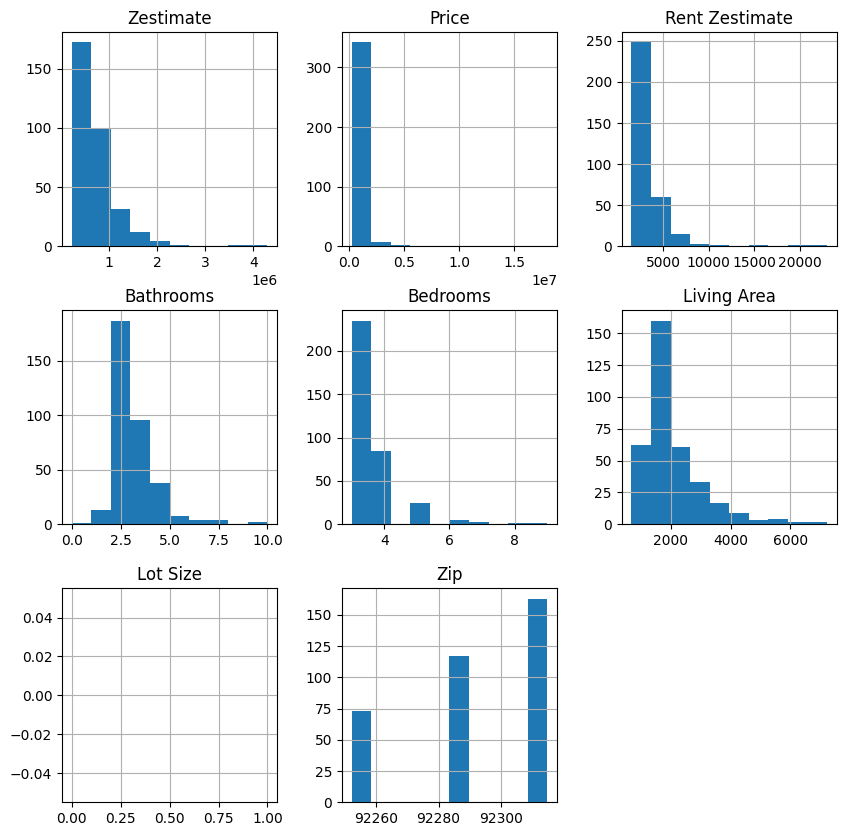

In [28]:
# 6. Visualizar la distribución de los datos numéricos
df.hist(figsize=(10,10))
plt.show()

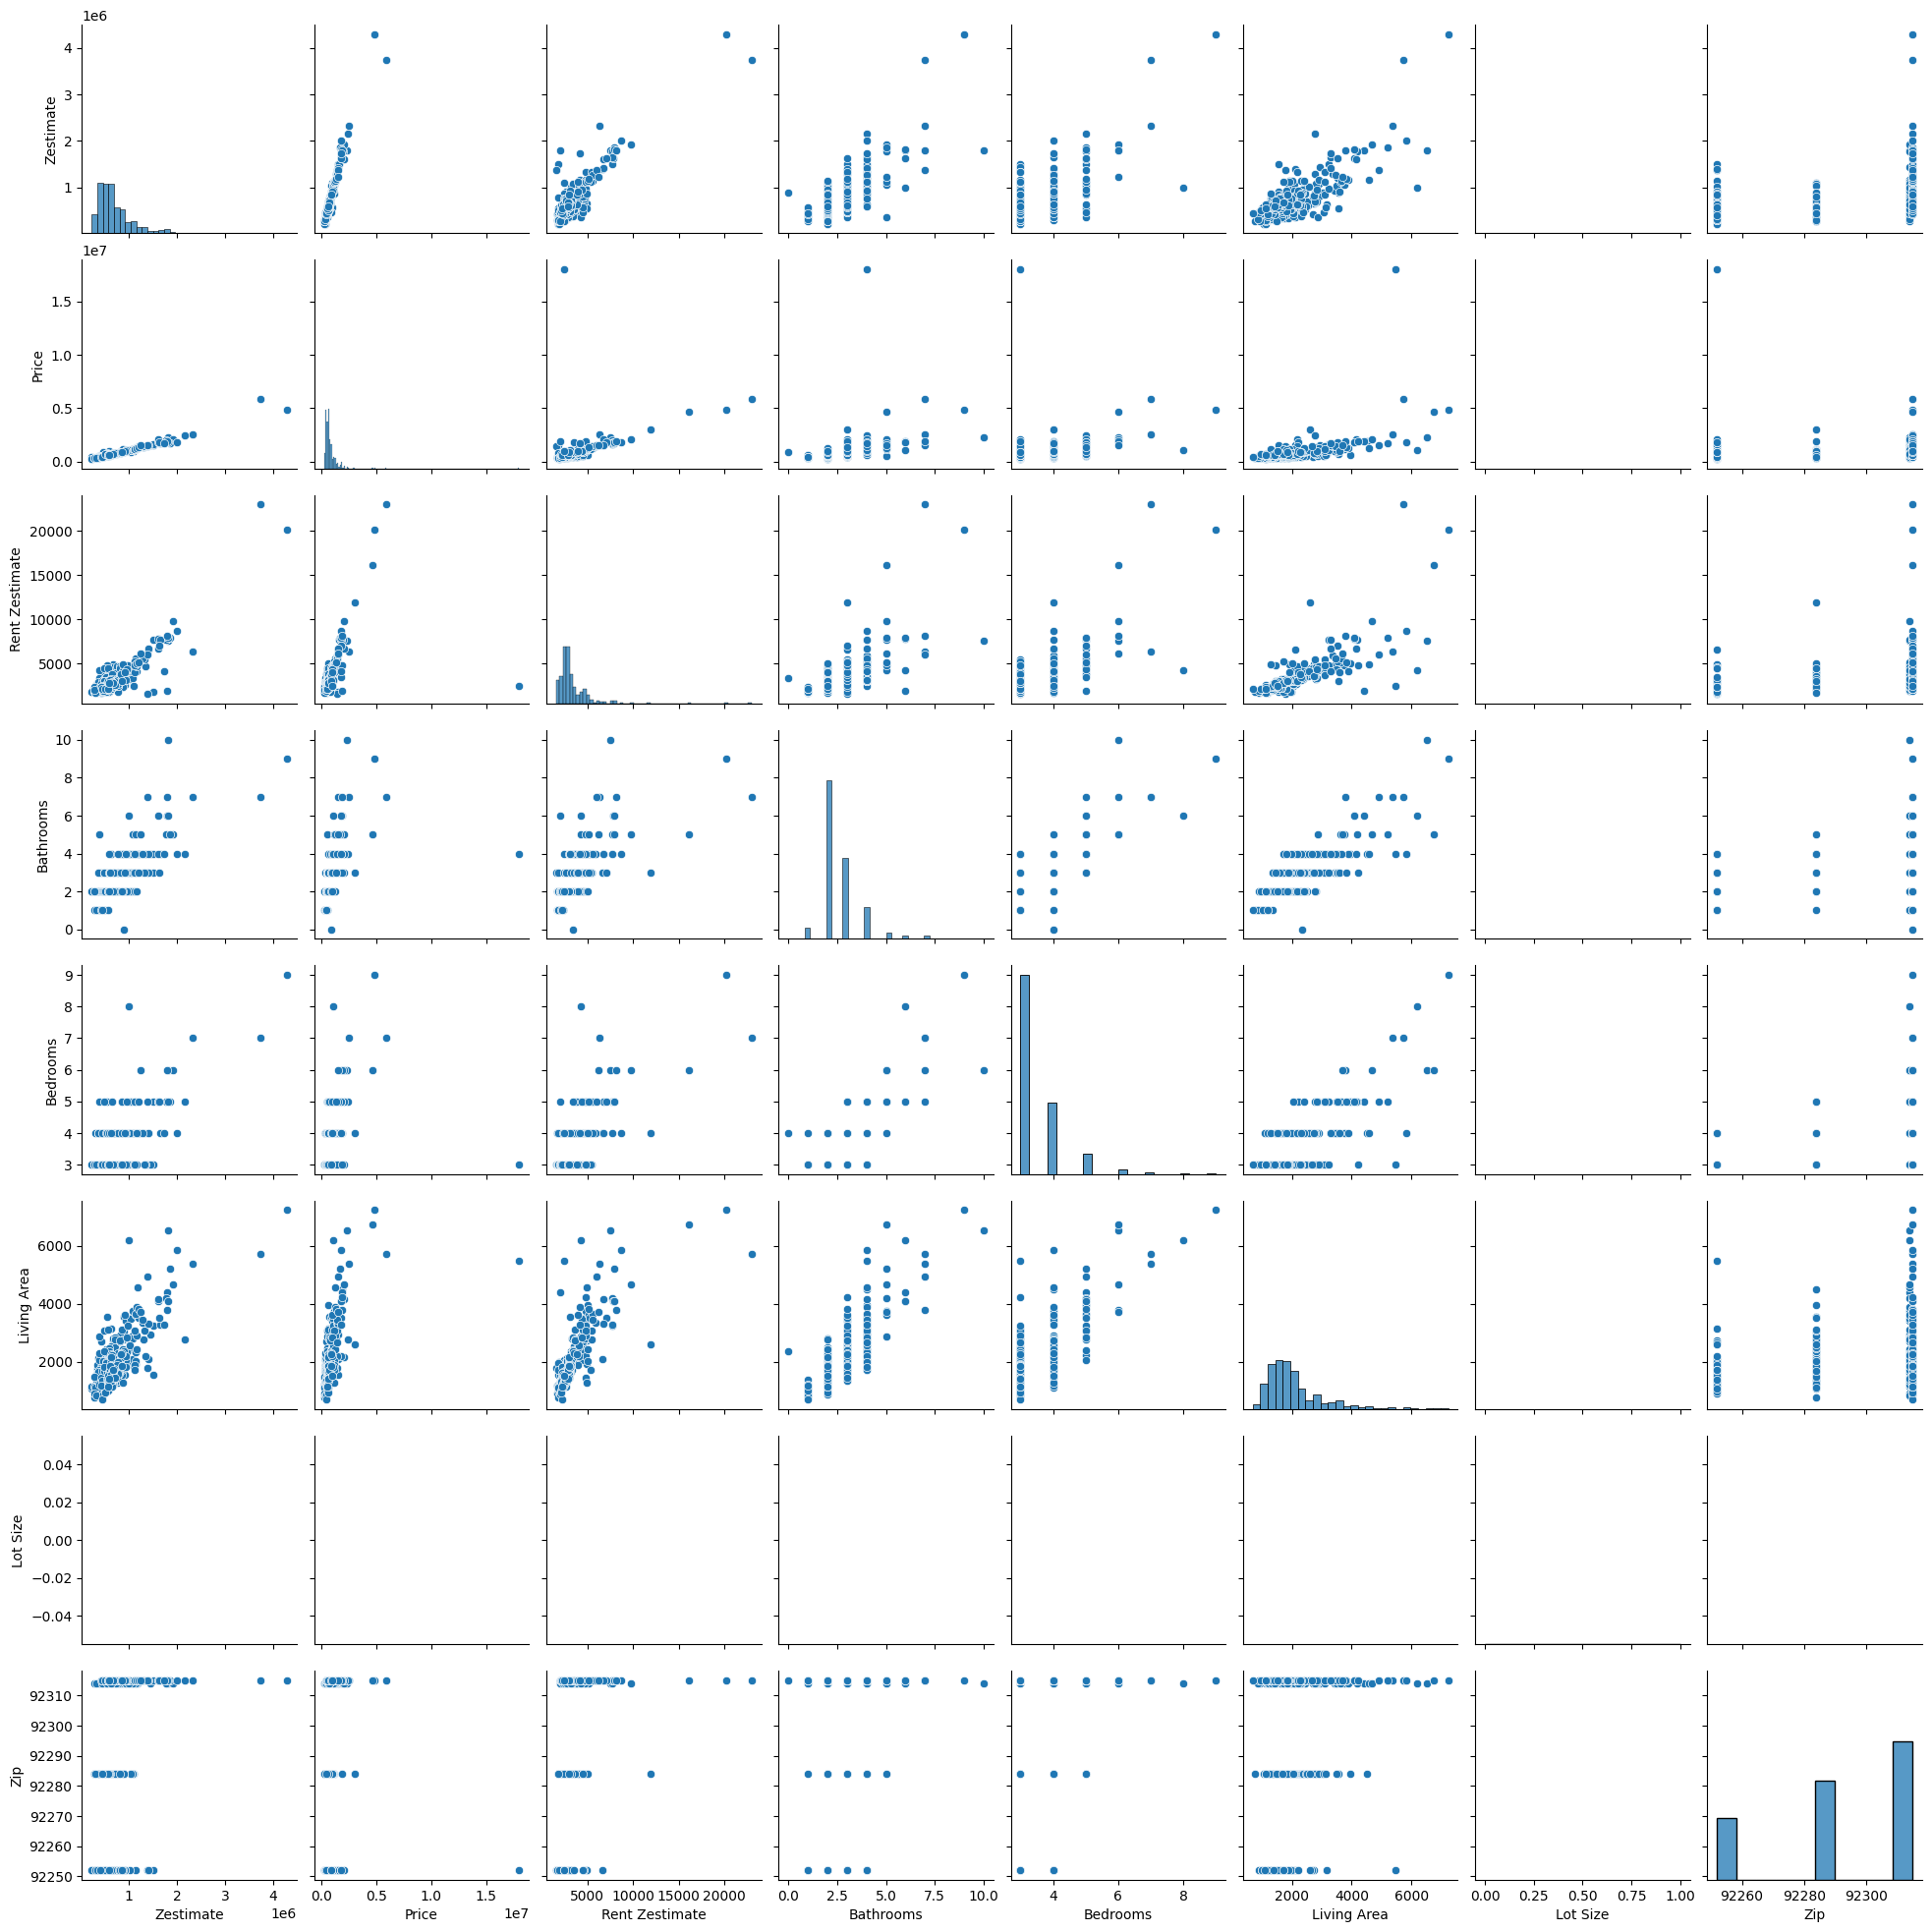

In [29]:
# 7. Visualizar la relación entre diferentes variables
sns.pairplot(df)
plt.show()

In [30]:
# Agrupar por número de habitaciones y contar
habitaciones = df.groupby('Bedrooms')['Bedrooms'].count()

# Agrupar por número de baños y contar
banos = df.groupby('Bathrooms')['Bathrooms'].count()

# Agrupar por código postal y contar
codigo_postal = df.groupby('Zip')['Zip'].count()

# Imprimir los resultados
print("Ventas por número de habitaciones:\n", habitaciones)
print("\nVentas por número de baños:\n", banos)
print("\nVentas por código postal:\n", codigo_postal)

Ventas por número de habitaciones:
 Bedrooms
3    235
4     85
5     24
6      5
7      2
8      1
9      1
Name: Bedrooms, dtype: int64

Ventas por número de baños:
 Bathrooms
0       1
1      13
2     187
3      96
4      38
5       8
6       4
7       4
9       1
10      1
Name: Bathrooms, dtype: int64

Ventas por código postal:
 Zip
92252     73
92284    117
92314     57
92315    106
Name: Zip, dtype: int64


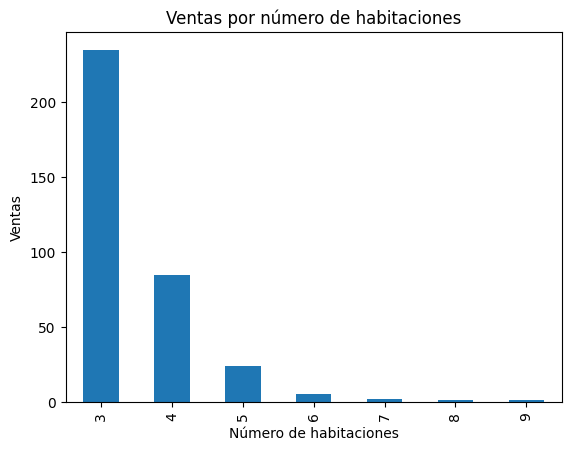

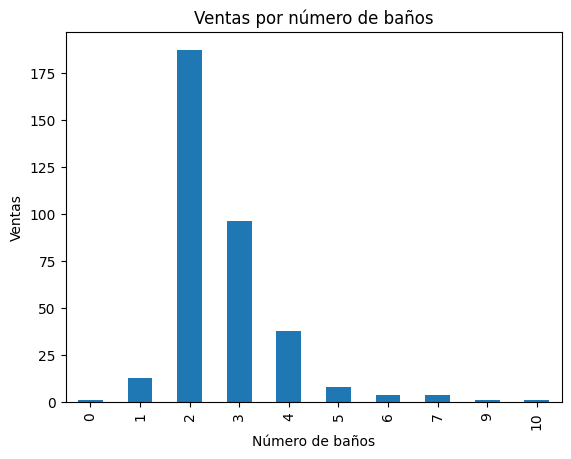

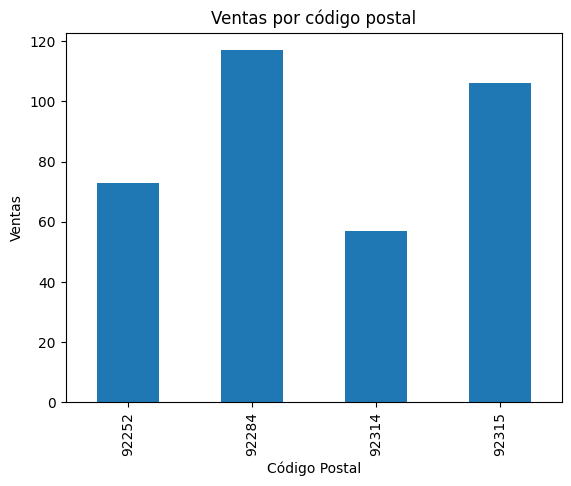

In [31]:
# Gráfico de barras para habitaciones
habitaciones.plot(kind='bar')
plt.title('Ventas por número de habitaciones')
plt.xlabel('Número de habitaciones')
plt.ylabel('Ventas')
plt.show()

# Gráfico de barras para baños
banos.plot(kind='bar')
plt.title('Ventas por número de baños')
plt.xlabel('Número de baños')
plt.ylabel('Ventas')
plt.show()

# Gráfico de barras para código postal
codigo_postal.plot(kind='bar')
plt.title('Ventas por código postal')
plt.xlabel('Código Postal')
plt.ylabel('Ventas')
plt.show()

# Modelo de predicción 

In [67]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [68]:
# Preparar los datos para el entrenamiento del modelo
X = df[['Bathrooms', 'Bedrooms', 'Living Area', 'Home Type', 'City']]  # características
y = df['Price']  # etiqueta


In [69]:
# Preprocesamiento para columnas numéricas
numeric_features = ['Bathrooms', 'Bedrooms', 'Living Area']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [70]:
# Preprocesamiento para columnas categóricas
categorical_features = ['Home Type', 'City']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [71]:
# Juntar los preprocesadores
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [72]:
# Definir el modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])


In [73]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
# Ajustar los hiperparámetros
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Bathrooms',
                                                                          'Bedrooms',
                                                                          'Living '
                                                                          'Area']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Home '
                                                                          'Type',
                                                                          'City'])])),
                                       ('classifier',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300, 400]},
             scoring='neg_mean_squared_error')

In [75]:
# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros: ", grid_search.best_params_)


Mejores hiperparámetros:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 400}


In [76]:
# Evaluar el rendimiento del modelo con los mejores hiperparámetros
predictions = grid_search.predict(X_test)
print("Error cuadrático medio del modelo: ", mean_squared_error(y_test, predictions))


Error cuadrático medio del modelo:  639593513545.1859


In [78]:
# Estimación de precio para una nueva propiedad
new_property = pd.DataFrame({
    'Bathrooms': [2],
    'Bedrooms': [3],
    'Living Area': [1500],
    'Home Type': ['House'],
    'City': ['San Francisco']
})
price_estimate = grid_search.predict(new_property)
print("Estimación de precio para la nueva propiedad:",round(price_estimate[0], 2),"USD")

Estimación de precio para la nueva propiedad: 621252.61 USD
